<a href="https://colab.research.google.com/github/mozesandrianto/tracker-enabled-dbcontext/blob/master/AIBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import files
from matplotlib import dates as mdates

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uploaded = files.upload()

Saving superstore_dataset.csv to superstore_dataset.csv


In [ ]:
df = pd.read_csv('superstore_dataset.csv')

# Data cleaning and conditioning

In [ ]:
#Part where we try to see if there's null values, and then we change it..
nullValue_int = df.isnull().sum().sum() #sum if there are NaN values
print(f"Data that are null: {nullValue_int} data")
nullValue = df.isnull().sum() #find which one has null value:
nullValue

#The csv data contains 11 null values, which are from the postal code, next we need to find out which postal code are missing?
Sorted_df = df.sort_values('Postal Code', ascending = False, na_position="first")
Sorted_df[0:nullValue_int+2] #because we know all of the missing values are in Postal code, we wanted to see what are these missing values...

#After we have sorted the data, we now know all missing values are from the state: Vermont! Now, just a sanity check to see if all vermont has missing postal code or not
df[df['State'] == 'Vermont']

#now, let's fill the na values with something
Optimized_df = df
Optimized_df['Postal Code'] = Optimized_df['Postal Code'].fillna(0)
nullValue_int = Optimized_df.isnull().sum().sum() #sum if there are NaN values
print(f"After conditioning, data that are null: {nullValue_int} data")

#Now that we are sure that there are no more missing values, we can proceed to group and analyze things. Note, we still have the "RAW" data called df, and we are now working on the optimized data frame, called: Optimized_df

Data that are null: 11 data
After conditioning, data that are null: 0 data


In [ ]:
Filtered_Optimized_df = Optimized_df

Filtered_Optimized_df['Order Date'] = pd.to_datetime(Filtered_Optimized_df['Order Date'], format='%d/%m/%Y') #change the date formats
Filtered_Optimized_df['Ship Date'] = pd.to_datetime(Filtered_Optimized_df['Ship Date'], format='%d/%m/%Y') #change the date formats
# Optimized_df['Ship Date'] = pd.to_datetime(Optimized_df['Ship Date'], format='%d/%m/%Y')
Duration = Filtered_Optimized_df['Ship Date'] - Filtered_Optimized_df['Order Date']
Filtered_Optimized_df.insert(4, 'Duration to ship', Duration, True)
Filtered_Optimized_df = Filtered_Optimized_df.drop(columns= ['Row ID', 'Country'])
# Filtered_Optimized_df

# Time Series Analysis
- Getting the seasonalities and condition it to be usable
- plot the sales per month

In [ ]:
# condition the data to be usable for time series analysis
TimeSeries_Analysis = Filtered_Optimized_df.set_index('Order Date')
TimeSeries_Analysis.index
TimeSeries_Analysis['Year'] = TimeSeries_Analysis.index.year
TimeSeries_Analysis['Month'] = TimeSeries_Analysis.index.month
TimeSeries_Analysis['Weekday Name'] = TimeSeries_Analysis.index.day_name()


In [ ]:
TimeSeries_Analysis.head(5)

,Order ID,Ship Date,Duration to ship,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Weekday Name
Order Date,,,,,,,,,,,,,,,,,,,
2017-11-08,CA-2017-152156,2017-11-11,3 days,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,Wednesday
2017-11-08,CA-2017-152156,2017-11-11,3 days,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,Wednesday
2017-06-12,CA-2017-138688,2017-06-16,4 days,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,Monday
2016-10-11,US-2016-108966,2016-10-18,7 days,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,Tuesday
2016-10-11,US-2016-108966,2016-10-18,7 days,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,Tuesday


## **Monthly and Weekly analysis of sales (sales sum)**

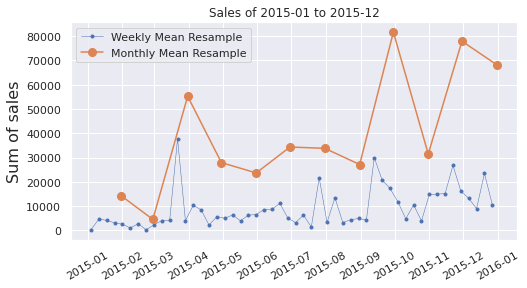

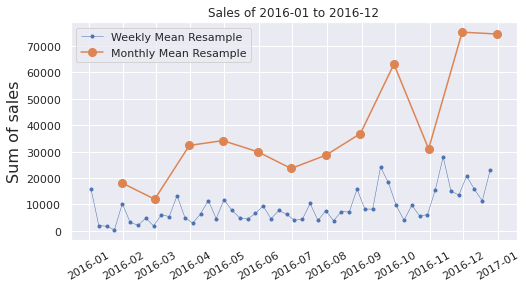

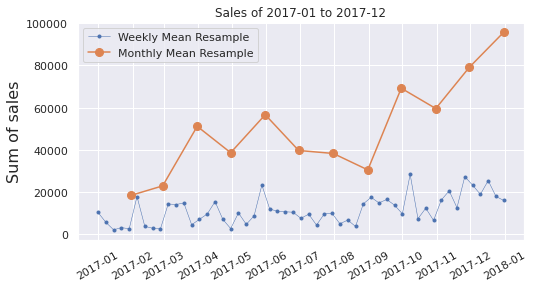

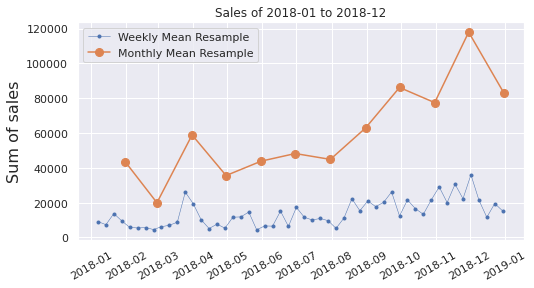

In [ ]:
timeSeries_weekly_mean = TimeSeries_Analysis.resample('W').sum()
timeSeries_monthly_mean = TimeSeries_Analysis.resample('M').sum()
# tempDat.head(3)
# timeSeries_weekly_mean['Sales']

def plottings(start,stop):
  months   = mdates.MonthLocator()  # every month
  fig,ax = plt.subplots(figsize = (8,4))
  # ax.plot(TimeSeries_Analysis['Sales'], marker='.', linestyle = '-', linewidth = 0.5, label = 'Daily')
  ax.plot(timeSeries_weekly_mean.loc[start:stop, 'Sales'],
  marker='.', linestyle='-', linewidth = 0.5, label='Weekly Sum Sales')
  ax.plot(timeSeries_monthly_mean.loc[start:stop, 'Sales'],
  marker='o', markersize=8, linestyle='-',  label='Monthly Sum Sales')
  ax.xaxis.set_major_locator(months)
  plt.xticks(rotation=30)
  # plt.xticks(month, color='red')
  # fig.xaxis.set_major_locator(mdates.MonthFormatter('%y-%m-%d'))
  ax.set_ylabel('Sum of sales')
  ax.set_title(f'Sales of {start} to {stop}')
  ax.legend();

plottings('2015-01', '2015-12')
plottings('2016-01', '2016-12')
plottings('2017-01', '2017-12')
plottings('2018-01', '2018-12')

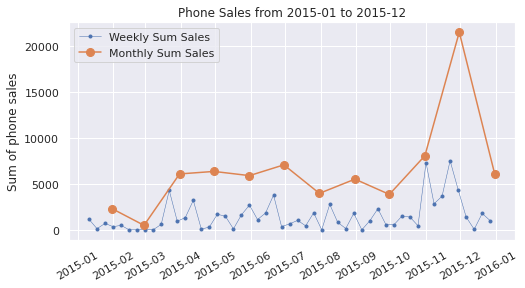

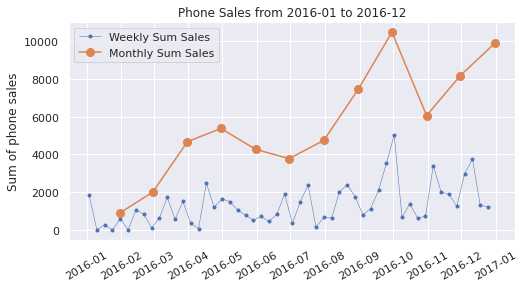

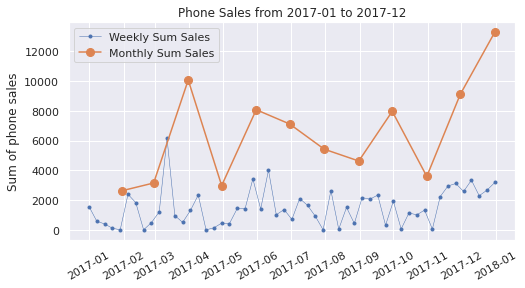

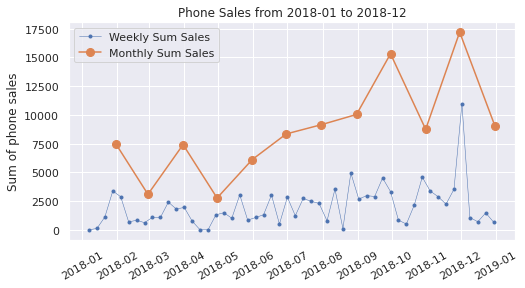

In [ ]:
# TimeSeries_Analysis['Sub-Category' == 'Phones']
# TimeSeries_Analysis[TimeSeries_Analysis['Sub-Category'] == 'Phones']
timeSeries_weekly_mean = TimeSeries_Analysis[TimeSeries_Analysis['Sub-Category'] == 'Phones'].resample('W').sum()
timeSeries_monthly_mean = TimeSeries_Analysis[TimeSeries_Analysis['Sub-Category'] == 'Phones'].resample('M').sum()

# timeSeries_weekly_mean
# tempDat.head(3)
# timeSeries_weekly_mean['Sales']

def plottings(start,stop):
  months   = mdates.MonthLocator()  # every month
  fig,ax = plt.subplots(figsize = (8,4))
  # ax.plot(TimeSeries_Analysis['Sales'], marker='.', linestyle = '-', linewidth = 0.5, label = 'Daily')
  ax.plot(timeSeries_weekly_mean.loc[start:stop, 'Sales'],
  marker='.', linestyle='-', linewidth = 0.5, label='Weekly Sum Sales')
  ax.plot(timeSeries_monthly_mean.loc[start:stop, 'Sales'],
  marker='o', markersize=8, linestyle='-',  label='Monthly Sum Sales')
  ax.xaxis.set_major_locator(months)
  plt.xticks(rotation=30)
  # plt.xticks(month, color='red')
  # fig.xaxis.set_major_locator(mdates.MonthFormatter('%y-%m-%d'))
  ax.set_ylabel('Sum of phone sales')
  ax.set_title(f'Phone Sales from {start} to {stop}')
  ax.legend();

plottings('2015-01', '2015-12')
plottings('2016-01', '2016-12')
plottings('2017-01', '2017-12')
plottings('2018-01', '2018-12')

## **Monthly and Weekly analysis of sales (sales mean)**

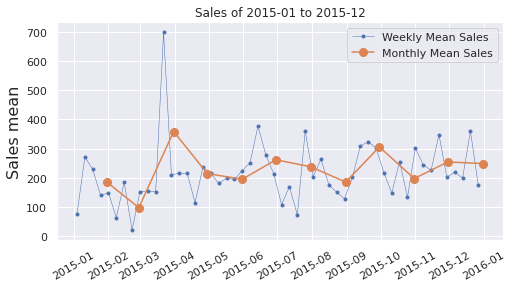

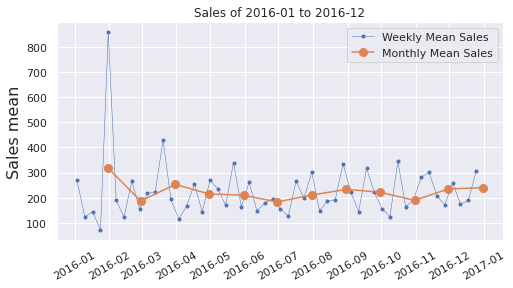

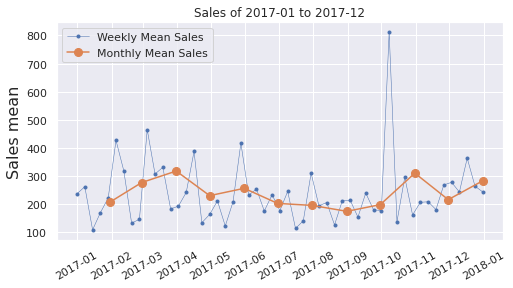

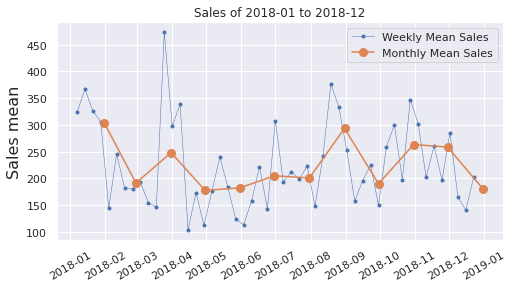

In [ ]:
timeSeries_weekly_mean = TimeSeries_Analysis.resample('W').mean()
timeSeries_monthly_mean = TimeSeries_Analysis.resample('M').mean()
# tempDat.head(3)
# timeSeries_weekly_mean['Sales']

def plottings(start,stop):
  months   = mdates.MonthLocator()  # every month
  fig,ax = plt.subplots(figsize = (8,4))
  # ax.plot(TimeSeries_Analysis['Sales'], marker='.', linestyle = '-', linewidth = 0.5, label = 'Daily')
  ax.plot(timeSeries_weekly_mean.loc[start:stop, 'Sales'],
  marker='.', linestyle='-', linewidth = 0.5, label='Weekly Mean Sales')
  ax.plot(timeSeries_monthly_mean.loc[start:stop, 'Sales'],
  marker='o', markersize=8, linestyle='-',  label='Monthly Mean Sales')
  ax.xaxis.set_major_locator(months)
  plt.xticks(rotation=30)
  # plt.xticks(month, color='red')
  # fig.xaxis.set_major_locator(mdates.MonthFormatter('%y-%m-%d'))
  ax.set_ylabel('Sales mean')
  ax.set_title(f'Sales of {start} to {stop}')
  ax.legend();

plottings('2015-01', '2015-12')
plottings('2016-01', '2016-12')
plottings('2017-01', '2017-12')
plottings('2018-01', '2018-12')

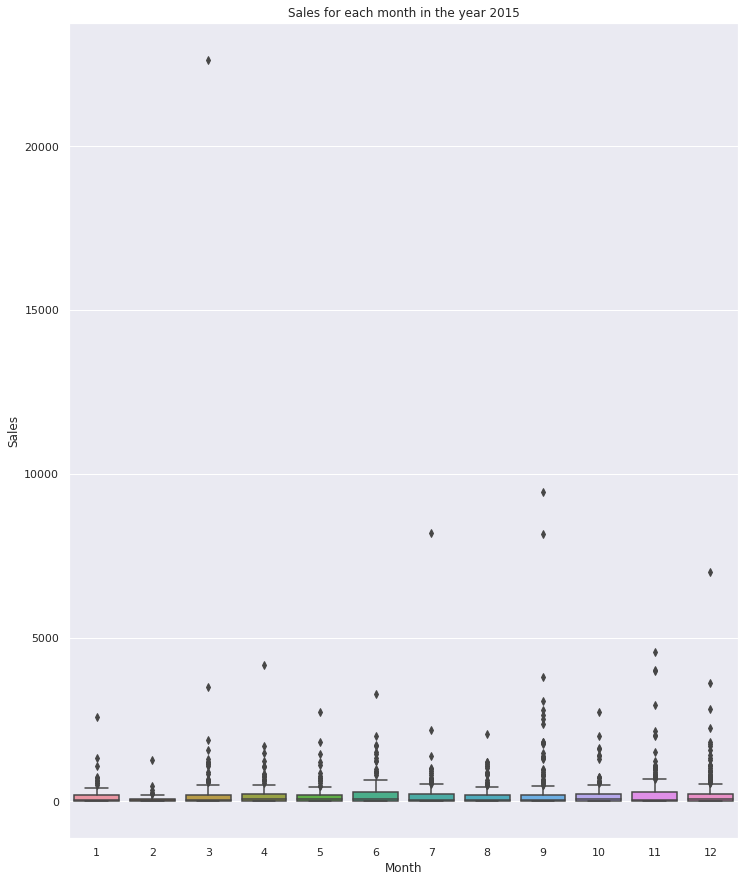

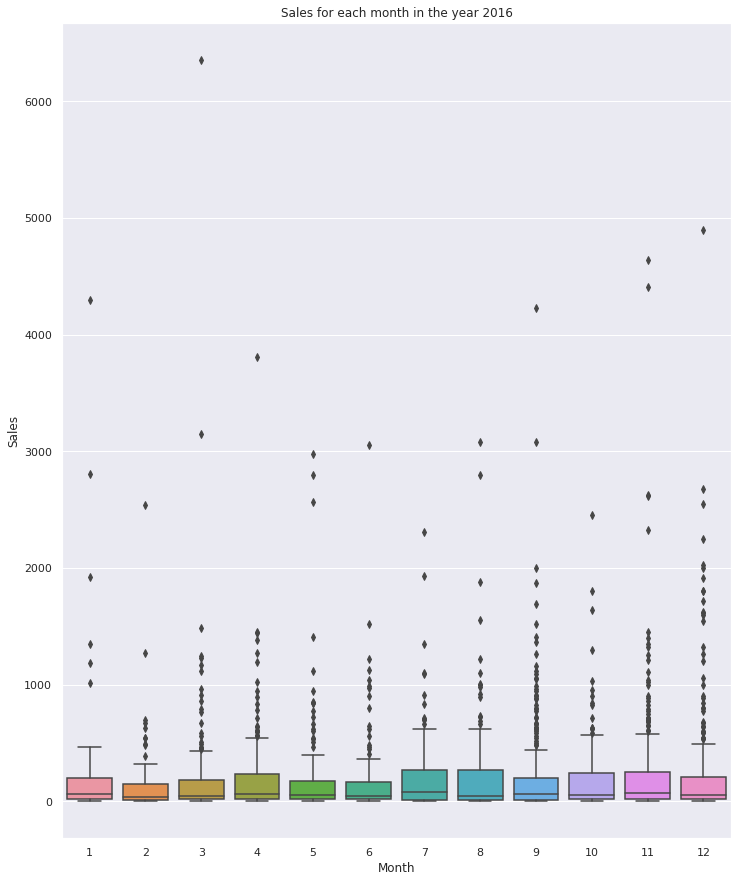

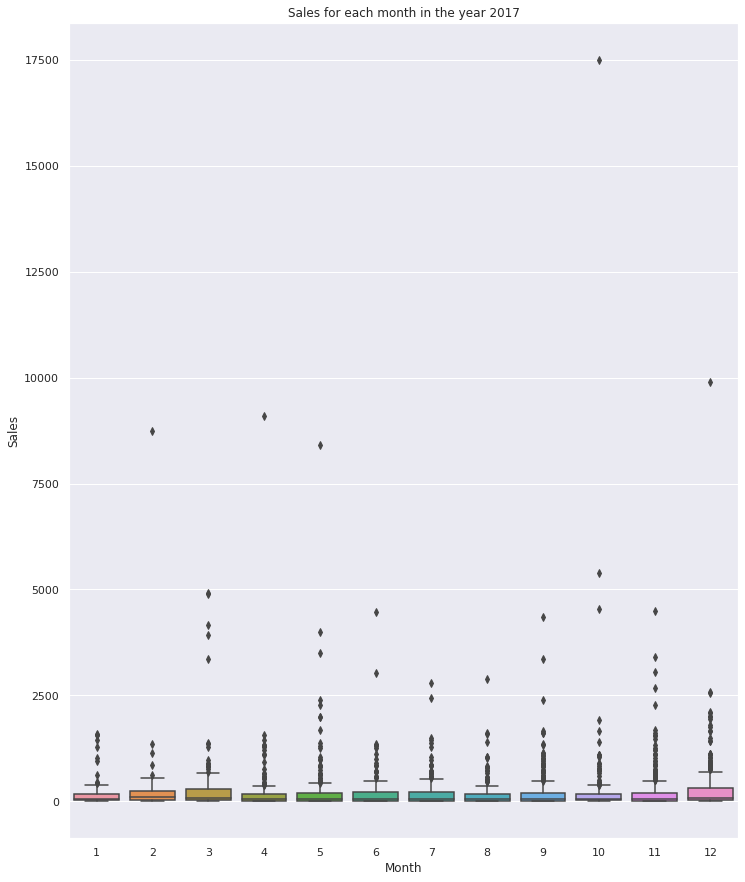

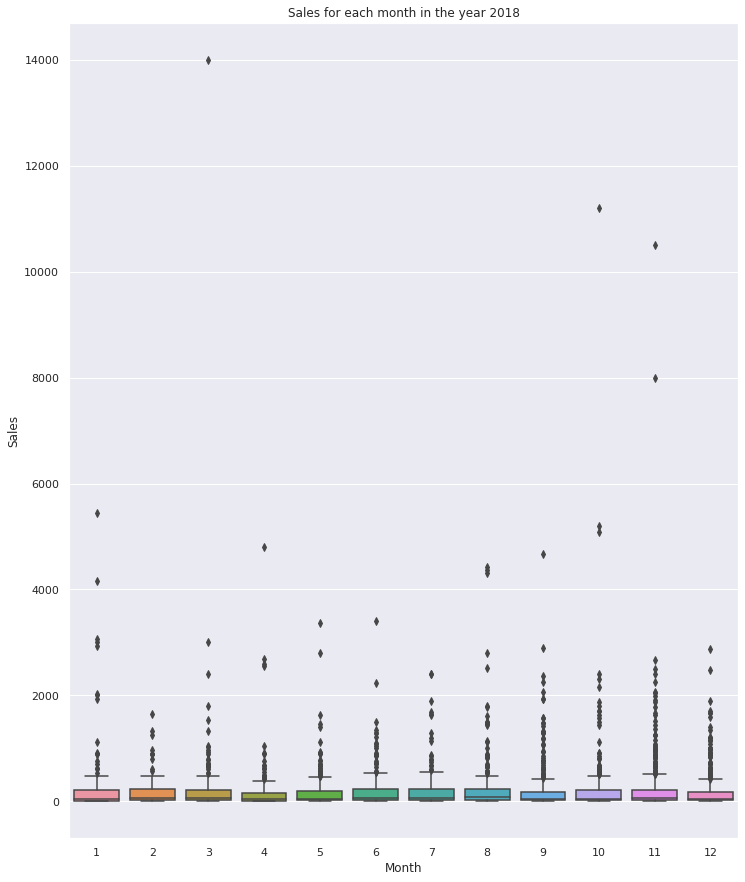

In [ ]:
#Check the seasonalitiesand plotting the sales per month:
years = []
for yr in range(2015,2019): #just to get the list of the years
  years.append(str(yr))

############ PLOTTING THE Seasonalities for each year every month! ###############
  sns.set(rc={'figure.figsize':(12, 15)})

for yr in years:
  plots = sns.boxplot(data = TimeSeries_Analysis.loc[yr], x = 'Month', y = 'Sales')
  # plots.fig.suptitle(f'Year Number: {yr}', fontsize = 24)
  plt.title(f"Sales for each month in the year {yr}")
  plt.show()

# Seasonal decomposition of the sales sum

In [ ]:
# test = TimeSeries_Analysis['Sales'].resample('M').sum()
# result = seasonal_decompose(test, model = 'multiplicative')

# observed = result.observed
# seasonal = result.seasonal
# residual = result.resid

# dfs = pd.DataFrame({"observed":observed, "seasonal":seasonal,"residual":residual})

# years = mdates.YearLocator()    # only print label for the years
# months = mdates.MonthLocator()  # mark months as ticks
# years_fmt = mdates.DateFormatter('%Y-%b')
# fmt = mdates.DateFormatter('%b')


# _, axes = plt.subplots(nrows=3,ncols=1, figsize=(20, 10))
# for i, ax in enumerate(axes):
#     ax = dfs.iloc[:,i].plot(ax=ax)
#     ax.xaxis.set_major_locator(years)
#     ax.xaxis.set_major_formatter(years_fmt)
#     ax.xaxis.set_minor_locator(months)
#     ax.xaxis.set_minor_formatter(fmt)
#     ax.set_ylabel(dfs.iloc[:,i].name)
#     plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
#     plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

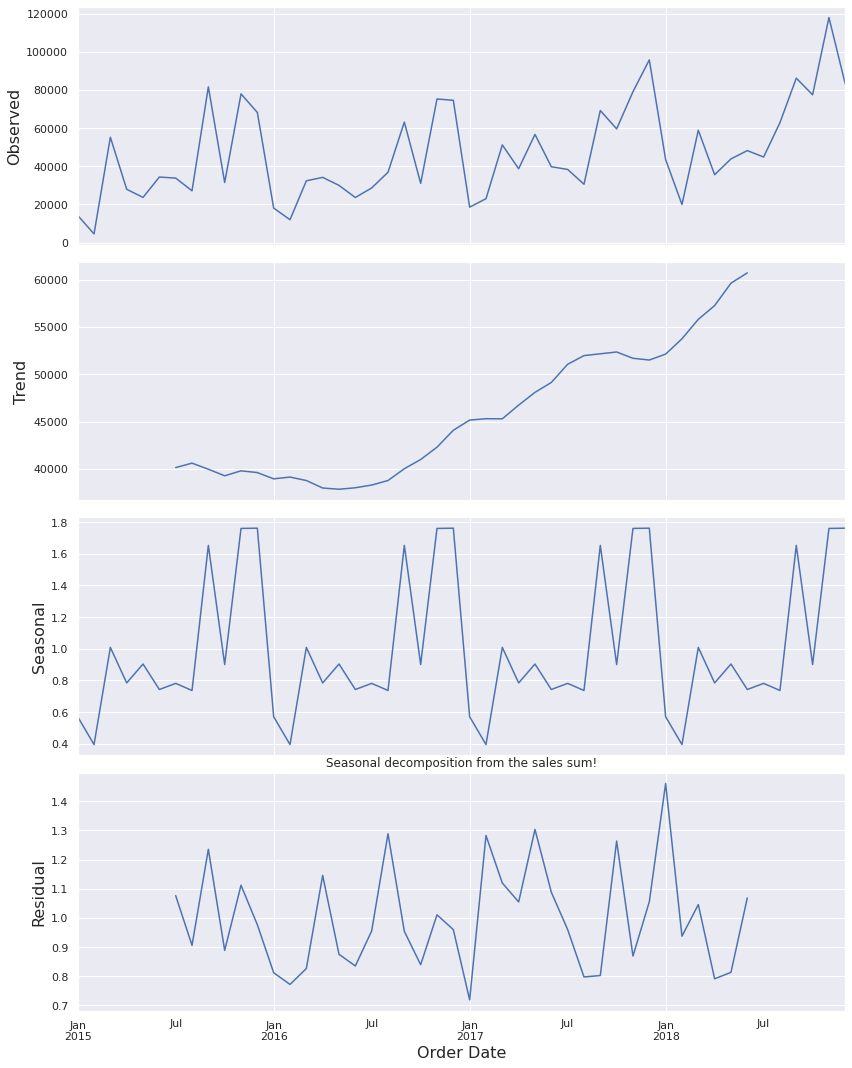

In [ ]:
#seasonal decompose (from the sales sum):
test = TimeSeries_Analysis['Sales'].resample('M').sum()




# test.index

result = seasonal_decompose(test, model = 'multiplicative')
result.plot()

plt.rcParams['axes.labelsize'] = 16
ax.xaxis.set_minor_locator(months)

plt.title("Seasonal decomposition from the sales sum!")
plt.show()

# EDA

In [ ]:
testDF = Filtered_Optimized_df
testDF = testDF.pivot_table(index = ['Category'], aggfunc = 'size')
testDF

Category
Furniture          2078
Office Supplies    5909
Technology         1813
dtype: int64

In [ ]:
getPlots = Filtered_Optimized_df.groupby(by=["Sub-Category", "Segment"], as_index= False, sort = True)['Product Name'].count()
getPlots

,Sub-Category,Segment,Product Name
0,Accessories,Consumer,400
1,Accessories,Corporate,219
2,Accessories,Home Office,137
3,Appliances,Consumer,240
4,Appliances,Corporate,153
5,Appliances,Home Office,66
6,Art,Consumer,423
7,Art,Corporate,214
8,Art,Home Office,148
9,Binders,Consumer,769


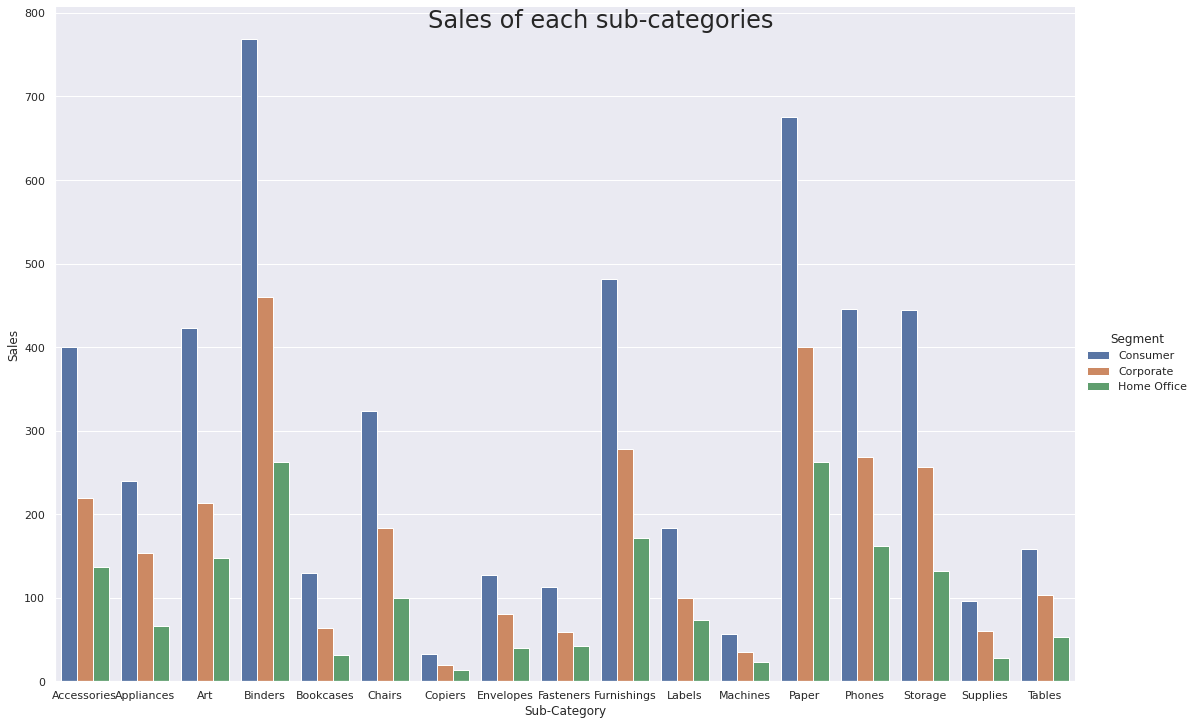

TypeError: ignored

In [ ]:
# fig, ax = plt.subplots(figsize=(15,7))
getPlots = Filtered_Optimized_df.groupby(by=["Segment", "Sub-Category", "Category"], as_index= False, sort = True).count()
getPlots

sns.set(rc={'figure.figsize':(12, 15)})
plots = sns.catplot(data = getPlots, kind="bar", x="Sub-Category", y = "Sales",
                 hue = "Segment", ci=None, n_boot=0, height = 10, aspect = 3/2)
plots.fig.suptitle('Sales of each sub-categories', fontsize = 24)
plt.show()
# getPlots[''].value_counts()
getPlots[].plot(kind='pie', y='Sub-Category')
# getPlots = Filtered_Optimized_df.groupby(by=["Sub-Category"], as_index= False, sort = True)['Sales'].count()
# getPlots.plot(kind = 'pie', y='Sub-Category')
# plt.figure(figsize=(12,10))
# getPlots['Sub-Category'].plot.pie(autopct="%1.1f%%")
# plt.title("Percentage of the items sold per sub-category")
# plt.show()

# plt.figure(figsize=(12,10))
# Filtered_Optimized_df['Sub-Category'].value_counts().head(10).plot.pie(autopct="%1.1f%%")
# plt.title("Tables")
# plt.show()


In [ ]:
Filtered_Optimized_df['Sub-Category'].value_counts()
# prods3 = Filtered_Optimized_df['Sub-Category']


Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

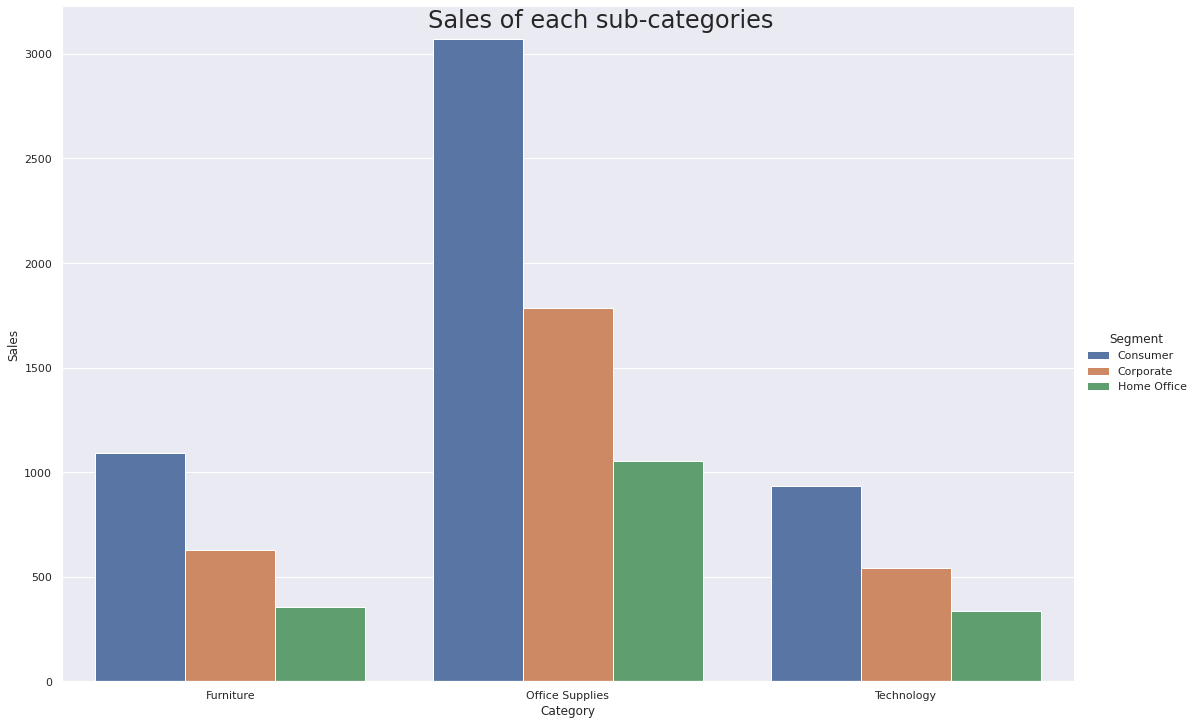

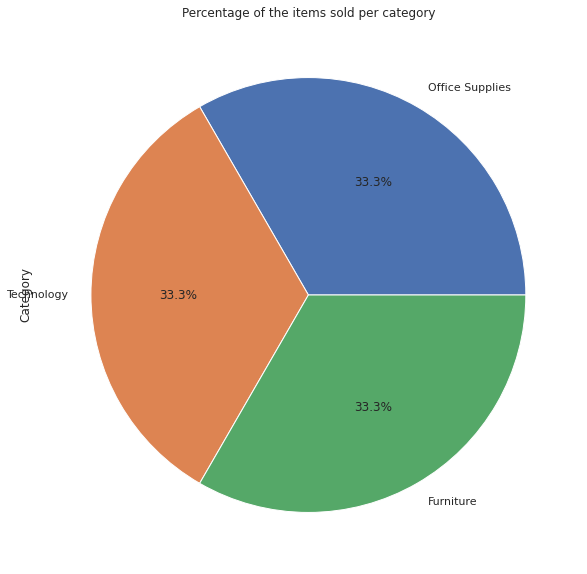

In [ ]:
getPlots = Filtered_Optimized_df.groupby(by=["Category", "Segment"], as_index= False, sort = True)['Sales'].count()
getPlots
# getPlots.plot(x = 'Sub-Category', y = 'sum')
# getPlots['Segment']

sns.set(rc={'figure.figsize':(12, 15)})
plots = sns.catplot(data = getPlots, kind="bar", x="Category", y = "Sales",
                 hue = "Segment", ci=None, n_boot=0, height = 10, aspect = 3/2)
plots.fig.suptitle('Sales of each sub-categories', fontsize = 24)
plt.show()
# getPlots[''].value_counts()


plt.figure(figsize=(12,10))
getPlots['Category'].value_counts().head(20).plot.pie(autopct="%1.1f%%")
plt.title("Percentage of the items sold per category")
plt.show()


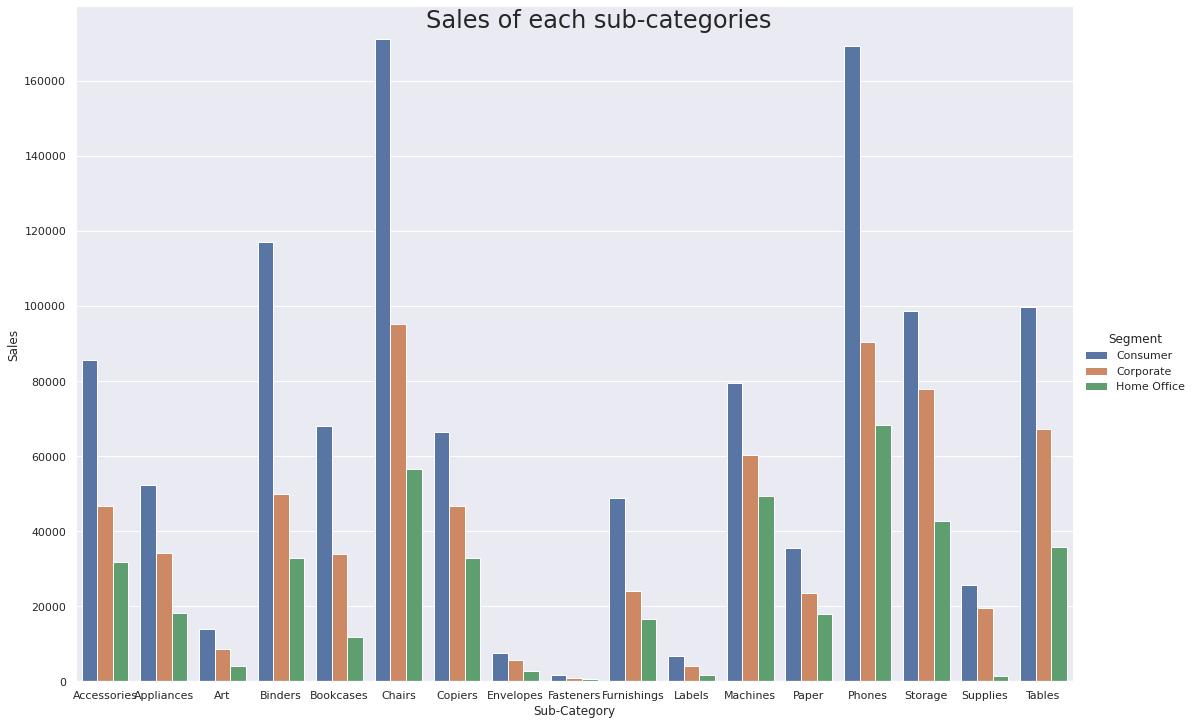

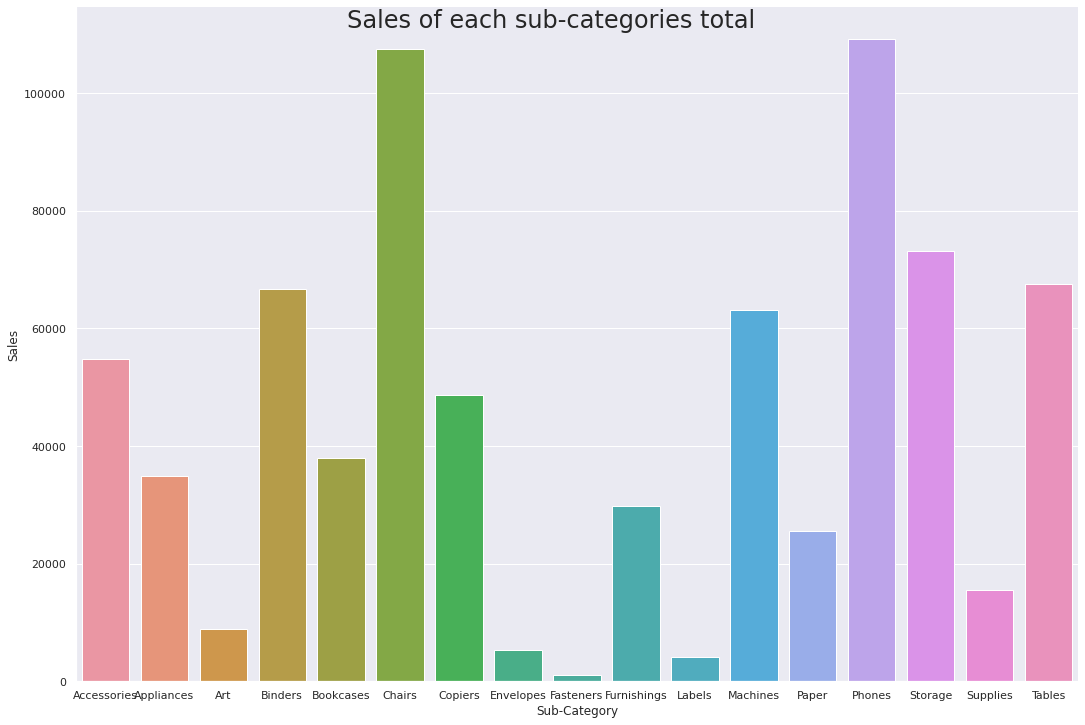

In [ ]:
getPlots = Filtered_Optimized_df.groupby(by=["Sub-Category", "Segment"], as_index= False, sort = True).sum()
getPlots
sns.set(rc={'figure.figsize':(12, 15)})
plots = sns.catplot(data = getPlots, kind="bar", x="Sub-Category", y = "Sales",
                 hue = "Segment", ci=None, n_boot=0, height = 10, aspect = 3/2)
plots.fig.suptitle('Sales of each sub-categories', fontsize = 24)
plt.show()

plots = sns.catplot(data = getPlots, kind="bar", x="Sub-Category", y = "Sales",
                 ci=None, n_boot=0, height = 10, aspect = 3/2)
plots.fig.suptitle('Sales of each sub-categories total', fontsize = 24)
plt.show()